# Imports and setting up viz

NB : conda env1 on PC, lam1env on spirit (Python3.12)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import os
import sys
sys.path.append('../../python_tools/')
from tools import *

In [2]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load and edit files

LAM output analysis on native ICO grid using tools from Valou and Cécile Agosta.

## Sims

In [3]:
LAM_dir='../../../JZ_simu_outputs/LAM/native_outputs/'

In [18]:
import psyplot.project as psy
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [10., 8.]

orc_file='{}/SRF/Output/MO/sim254_20170701_20170731_1M_sechiba_history.nc'.format(LAM_dir)
diag_routing_file='{}/SRF/Output/MO/sim254_20170701_20170731_1M_diag_routing.nc'.format(LAM_dir)
lmdz_file='{}/ATM/Output/MO/sim254_20170701_20170731_1M_histmth.nc'.format(LAM_dir)
restartphy_file='{}/ATM/Restart/sim254_20170731_restartphy.nc'.format(LAM_dir)
restart_file='{}/ICO/Restart/sim254_20170731_restart.nc'.format(LAM_dir)
start_file='{}/espagne_start_2010.nc'.format(LAM_dir)

In [5]:
ORC = xr.open_mfdataset(orc_file)
ORC = ORC.rename({'time_counter':'time'})
ORC

<xarray.Dataset>
Dimensions:                 (cell: 9241, nvertex: 6, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 1, axis_nbounds: 2)
Coordinates:
    lat                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    lon                     (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2017-07-16T12:00:00
Dimensions without coordinates: cell, nvertex, axis_nbounds
Data variables: (12/132)
    bounds_lon              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    bounds_lat              (cell, nvertex) float32 dask.array<chunksize=(9241, 6), meta=np.ndarray>
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    Contfrac                (cell) float32 dask.array<chunksize=(9241,), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    delfastr_daily          (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    delslowr_daily          (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    delstreamr_daily        (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    delstock_routing_daily  (time, cell) float32 dask.array<chunksize=(1, 9241), meta=np.ndarray>
    soilalb_bg              (albtyp, cell) float32 dask.array<chunksize=(2, 9241), meta=np.ndarray>
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Nov-06 09:40:56 GMT
    uuid:         d340b1b1-87f9-4511-8966-dbe78b9864b1

In [12]:
LMDZ=xr.open_mfdataset(lmdz_file)
LMDZ = LMDZ.rename({'time_counter':'time'})
LMDZ

<xarray.Dataset>
Dimensions:               (lat: 105, lon: 110, presnivs: 79, time: 1,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 28.0 28.24 28.48 ... 52.52 52.76 53.0
  * lon                   (lon) float32 -19.0 -18.72 -18.43 ... 11.43 11.72 12.0
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2017-07-16T12:00:00
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/80)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 dask.array<chunksize=(1, 105, 110), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(1, 105, 110), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 dask.array<chunksize=(1, 105, 110), meta=np.ndarray>
    ...                    ...
    vitv                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
    vitw                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
    temp                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
    ovap                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
    geoph                 (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
    pres                  (time, presnivs, lat, lon) float32 dask.array<chunksize=(1, 79, 105, 110), meta=np.ndarray>
Attributes:
    name:         histmth
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Nov-06 10:06:14 GMT
    uuid:         befd435f-29de-47cd-b6fb-f872f6b716c8

In [10]:
restartphy=xr.open_dataset(restartphy_file)
restartphy

<xarray.Dataset>
Dimensions:          (index: 100, points_physiques: 9241,
                      horizon_vertical: 730039, horizon_klevp1: 739280)
Dimensions without coordinates: index, points_physiques, horizon_vertical,
                                horizon_klevp1
Data variables: (12/213)
    controle         (index) float64 ...
    longitude        (points_physiques) float64 ...
    latitude         (points_physiques) float64 ...
    masque           (points_physiques) float64 ...
    FTER             (points_physiques) float64 ...
    FLIC             (points_physiques) float64 ...
    ...               ...
    ALE_WAKE         (points_physiques) float64 ...
    ALE_BL_STAT      (points_physiques) float64 ...
    RATQS_INTER      (horizon_vertical) float64 ...
    trs_Aga          (points_physiques) float64 ...
    du_gwd_rando     (horizon_vertical) float64 ...
    du_gwd_front     (horizon_vertical) float64 ...
Attributes:
    title:    Fichier redemmarage physique

In [13]:
restart=xr.open_dataset(restart_file)
restart

<xarray.Dataset>
Dimensions:          (cell_mesh: 10981, nvertex_mesh: 6, lev: 79, nq: 4,
                      cell_u: 33306, nvertex_u: 2)
Coordinates:
    lat_mesh         (cell_mesh) float64 ...
    lon_mesh         (cell_mesh) float64 ...
  * lev              (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 76.0 77.0 78.0 79.0
  * nq               (nq) float64 1.0 2.0 3.0 4.0
    lat_u            (cell_u) float64 ...
    lon_u            (cell_u) float64 ...
Dimensions without coordinates: cell_mesh, nvertex_mesh, cell_u, nvertex_u
Data variables: (12/20)
    bounds_lon_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lat_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lon_u     (cell_u, nvertex_u) float64 ...
    bounds_lat_u     (cell_u, nvertex_u) float64 ...
    iteration        float32 ...
    q                (nq, lev, cell_mesh) float64 ...
    ...               ...
    ulat             (lev, cell_mesh) float64 ...
    p                (lev, cell_mesh) float64 ...
    H2O_g            (lev, cell_mesh) float64 ...
    H2O_l            (lev, cell_mesh) float64 ...
    H2O_s            (lev, cell_mesh) float64 ...
    Aga              (lev, cell_mesh) float64 ...
Attributes:
    name:         restart
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Nov-06 10:06:16 GMT
    uuid:         2f5e1287-b643-47cf-8442-c8ad88b2c55c

In [22]:
start=xr.open_dataset(start_file)
start

<xarray.Dataset>
Dimensions:          (cell_mesh: 10981, nvertex_mesh: 6, lev: 79, nq: 4,
                      cell_u: 33306, nvertex_u: 2)
Coordinates:
    lat_mesh         (cell_mesh) float64 ...
    lon_mesh         (cell_mesh) float64 ...
  * lev              (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 76.0 77.0 78.0 79.0
  * nq               (nq) float64 1.0 2.0 3.0 4.0
    lat_u            (cell_u) float64 ...
    lon_u            (cell_u) float64 ...
Dimensions without coordinates: cell_mesh, nvertex_mesh, cell_u, nvertex_u
Data variables: (12/21)
    bounds_lon_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lat_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lon_u     (cell_u, nvertex_u) float64 ...
    bounds_lat_u     (cell_u, nvertex_u) float64 ...
    iteration        float32 ...
    q                (nq, lev, cell_mesh) float64 ...
    ...               ...
    p                (lev, cell_mesh) float64 ...
    H2O_g            (lev, cell_mesh) float64 ...
    H2O_l            (lev, cell_mesh) float64 ...
    H2O_s            (lev, cell_mesh) float64 ...
    Aga              (lev, cell_mesh) float64 ...
    Altitude         (cell_mesh) float64 382.9 370.8 364.5 ... 382.8 403.0 668.4
Attributes:
    name:         start0
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Sep-26 08:03:20 GMT
    uuid:         38358204-1468-44e9-bf64-f76b29977695

## Changes to dataset

In [ ]:
#make new var in lmdz netcdf file equal to precip *3600*24
LMDZ['precip_mm'] = LMDZ['precip']*3600*24
#save to netcdf file
lmdz_file2='{}/ATM/Output/MO/sim254_20170701_20170731_1M_histmth_modified.nc'.format(LAM_dir)
LMDZ.to_netcdf(lmdz_file2)

In [106]:
orc_file2='{}/SRF/Output/MO/sim254_20170701_20170731_1M_sechiba_history_modified.nc'.format(LAM_dir)
os.system('rm -f {}'.format(orc_file2))

ORC['soiltile_1']=ORC['soiltile'][0,:]
ORC['soiltile_2']=ORC['soiltile'][1,:]
ORC['soiltile_3']=ORC['soiltile'][2,:]

ORC.to_netcdf(orc_file2)

In [35]:
start["Altitude"] = start["phis"]/9.81
start["Altitude"].attrs["units"] = "m"
start["Altitude"].attrs["long_name"] = "Altitude"
start["Altitude"].attrs["standard_name"] = "Altitude"

start_file2='{}/espagne_start_2010_modified.nc'.format(LAM_dir)
start.to_netcdf(start_file2)

# Maps

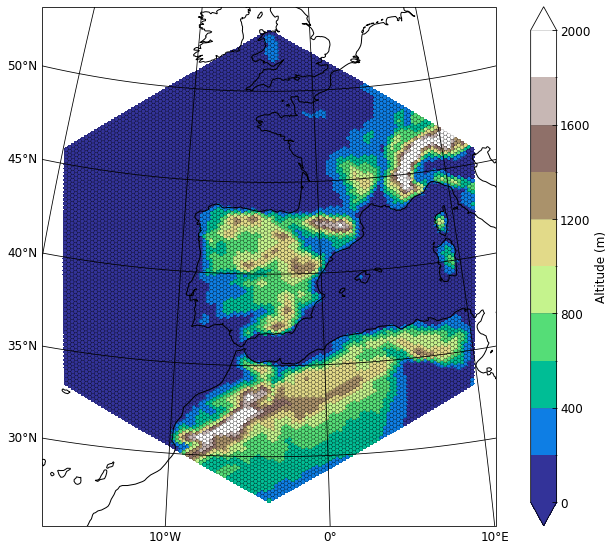

In [83]:
file=start_file2
var='Altitude'
vmin=0.0
vmax=2000
pas=(vmax-vmin) / 10

map=psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap='terrain',
    extend='both',
    projection='ortho',
    xgrid=True,ygrid=True,
    #add title
    # title=,
    bounds=np.arange(vmin, vmax + pas, pas),
    #add colorbar label
    clabel="Altitude (m)"

)
# map.cbar.set_label('Altitude (meters)')

In [80]:
psy.plot.show_fmtkeys('mapplot')

AttributeError: 'ProjectPlotter' object has no attribute 'show_fmtkeys'

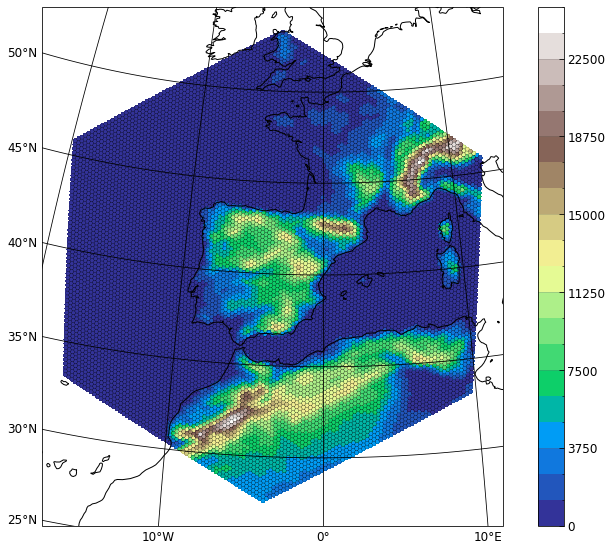

In [34]:
import psyplot.project as psy
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.util as cu
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [10., 8.]

lon=0
lat=40

maps=psy.plot.mapplot(start_file, name='phis', datagrid=dict(color='k', linewidth=0.2), 
                      cbar='r',clon=lon,clat=lat,tight=True,
                      bounds=np.linspace(0,25000,21,endpoint=True),lsm='50m',projection='ortho',
                      cmap='terrain',xgrid=True,ygrid=True)

In [ ]:
file=diag_routing_file
var='routing_irrigation'
vmin=0.0
vmax=0.01
pas=(vmax-vmin) / 10

psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap=wetW,
    extend='both',
    projection='ortho',
    #add title
    title=var,
    # bounds=np.arange(vmin, vmax + pas, pas)
)

psyplot.project.Project([    arr2: 2-dim DataArray of evap, with (lat, lon)=(105, 110), time_centered=2017-07-16T12:00:00, time_counter=2017-07-16T12:00:00, time_instant=2017-08-01])

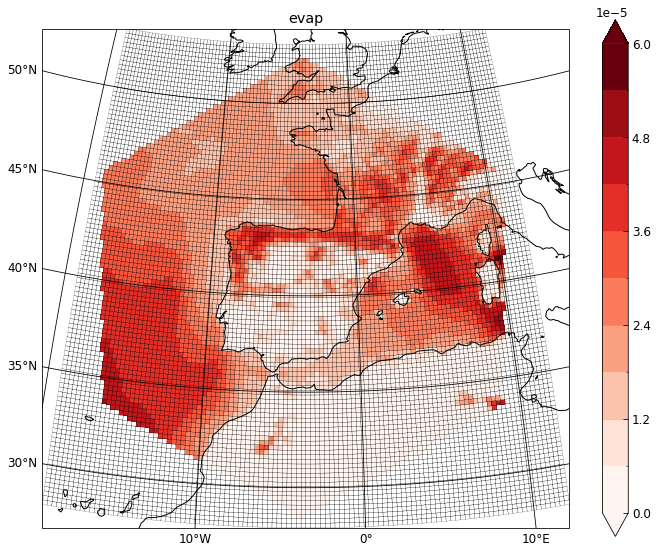

In [28]:
file=lmdz_file
var='evap'
vmin=0.0
vmax=0.5e+6
pas=0.001e+6

psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap=reds,
    extend='both',
    projection='ortho',
    title=var,
    # bounds=np.arange(vmin, vmax + pas, pas)
)